## Mass Shootings in USA Data Analysis
**By Mahek Sanghavi | Division C**

In [73]:
#Setup
import pandas as pd

In [74]:
#import the mass shooting dataset 
shootings_df = pd.read_csv("mass_shootings_data_usa.csv")

#print the first 10 rows of shootings_df
shootings_df.head(10)

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,2158417,"November 3, 2021",Virginia,Norfolk,NaN,3,2,NaN
1,2157991,"November 2, 2021",Alabama,Mobile,4120 Government Blvd,0,4,NaN
2,2156175,"November 1, 2021",Florida,Orlando,N Orange Ave and Wall St,0,4,NaN
3,2157206,"November 1, 2021",Texas,San Antonio,1900 block of W Laurel St,0,4,NaN
4,2155369,"October 31, 2021",Kentucky,Louisville,6210 Shepherdsville Rd,2,2,NaN
5,2155517,"October 31, 2021",Colorado,Littleton (Lakewood),6200 block of Alameda Ave,2,2,NaN
6,2155428,"October 31, 2021",Illinois,Flossmoor,3800 block of Ballantrae Way,1,3,NaN
7,2155282,"October 31, 2021",Texas,Houston,1909 Schilder Dr,1,3,NaN
8,2156001,"October 31, 2021",Texas,Fort Worth,3700 block of Lebow St,1,3,NaN
9,2155329,"October 31, 2021",Illinois,Joliet,1018 E Jackson St,2,12,NaN


In [75]:
#understanding the column data types
shootings_df.dtypes

Incident ID         int64
Incident Date      object
State              object
City Or County     object
Address            object
# Killed            int64
# Injured           int64
Operations        float64
dtype: object

In [76]:
#evaluate the missingness in my data
shootings_df.isnull().sum()

Incident ID          0
Incident Date        0
State                0
City Or County       0
Address              5
# Killed             0
# Injured            0
Operations        2000
dtype: int64

In [77]:
#total rows in the dataset
total_rows = len(shootings_df)
total_rows

2000

In [78]:
#Applied Title Casing to the Address Column
shootings_df["Address"]= shootings_df["Address"].str.title()

#Printed the first 10 rows to confirm the title casing was completed
shootings_df.head(10)

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,2158417,"November 3, 2021",Virginia,Norfolk,NaN,3,2,NaN
1,2157991,"November 2, 2021",Alabama,Mobile,4120 Government Blvd,0,4,NaN
2,2156175,"November 1, 2021",Florida,Orlando,N Orange Ave And Wall St,0,4,NaN
3,2157206,"November 1, 2021",Texas,San Antonio,1900 Block Of W Laurel St,0,4,NaN
4,2155369,"October 31, 2021",Kentucky,Louisville,6210 Shepherdsville Rd,2,2,NaN
5,2155517,"October 31, 2021",Colorado,Littleton (Lakewood),6200 Block Of Alameda Ave,2,2,NaN
6,2155428,"October 31, 2021",Illinois,Flossmoor,3800 Block Of Ballantrae Way,1,3,NaN
7,2155282,"October 31, 2021",Texas,Houston,1909 Schilder Dr,1,3,NaN
8,2156001,"October 31, 2021",Texas,Fort Worth,3700 Block Of Lebow St,1,3,NaN
9,2155329,"October 31, 2021",Illinois,Joliet,1018 E Jackson St,2,12,NaN


In [79]:
#Renaming our columns and ensuring they are all in lower case and use underscores instead of spaces
shootings_df = shootings_df.rename(columns={"Incident ID": "incident_id",
                                                "Incident Date": "date",
                                                "State": "state",
                                                "City Or County": "city",
                                                "Address": "address",
                                                "# Killed": "killed",
                                                "# Injured": "injured"})

#Printing the updated column names
shootings_df.columns

Index(['incident_id', 'date', 'state', 'city', 'address', 'killed', 'injured',
       'Operations'],
      dtype='object')

## Which incidents were the most severe in the last few years?

In [85]:
#Let us assume that higher killed equates to higher incident severity
#Based on this, we are going to sort and print our shootings_df by the killed column

shootings_df.sort_values(["killed"],ascending = False)





,incident_id,date,state,city,address,killed,injured,Operations
1389,1466705,"August 3, 2019",Texas,El Paso,7101 Gateway Blvd,23,23,NaN
1940,1049217,"February 14, 2018",Florida,Pompano Beach (Parkland),5901 Pine Island Rd,17,17,NaN
1663,1249561,"November 7, 2018",California,Thousand Oaks,99 Rolling Oaks Dr,13,2,NaN
1486,1410442,"May 31, 2019",Virginia,Virginia Beach,2405 Courthouse Drive,13,4,NaN
1675,1241819,"October 27, 2018",Pennsylvania,Pittsburgh,5898 Wilkins Ave,11,7,NaN
...,...,...,...,...,...,...,...,...
930,1731349,"July 11, 2020",New York,Rochester,485 N Clinton Ave,0,6,NaN
925,1732688,"July 12, 2020",Michigan,Lansing,3029 Beaujardin Dr,0,5,NaN
922,1734058,"July 13, 2020",Washington,Kent,23201 Pacific Hwy South,0,6,NaN
920,1733702,"July 13, 2020",New York,Brooklyn,Remsen Ave,0,6,NaN


In [86]:
#Create a column called "people involved" that is a sum of the killed and injured columns
shootings_df[ "people_involved"]=shootings_df["killed"] + shootings_df["injured"]

#Printing shootings df in descending order of people involved
shootings_df.sort_values(["people_involved"], ascending = False)

,incident_id,date,state,city,address,killed,injured,Operations,people_involved
1389,1466705,"August 3, 2019",Texas,El Paso,7101 Gateway Blvd,23,23,NaN,46
1940,1049217,"February 14, 2018",Florida,Pompano Beach (Parkland),5901 Pine Island Rd,17,17,NaN,34
1353,1492441,"August 31, 2019",Texas,Odessa,8250 Tx 191,8,23,NaN,31
1388,1467828,"August 4, 2019",Ohio,Dayton,419 E 5Th St,10,17,NaN,27
369,2019622,"May 30, 2021",Florida,Hialeah,7630 Nw 186Th St,3,20,NaN,23
...,...,...,...,...,...,...,...,...,...
493,1963052,"March 27, 2021",Illinois,Chicago,500 Block Of N Leamington Ave,0,4,NaN,4
1232,1578711,"December 21, 2019",Louisiana,Edgard,2555 La-18,0,4,NaN,4
492,1964030,"March 28, 2021",Texas,San Antonio,2011 Dollarhide Ave,0,4,NaN,4
1234,1577438,"December 20, 2019",Alabama,Tuskegee,2900 Block Of Davison St,2,2,NaN,4


## Which cities need attention? / Which cities are the most dangerous?

In [81]:
#Let us assume that more incidents equates to a city being more dangerous
#Based on this assumption, we will now make a dataframe that shows the total incidents for each city

city_df = shootings_df.groupby(["city", "state"]).agg(total_incidents = ("city", "count"))

## Printing city df in descending order of total incidents to highlight the most dangerous cities
city_df.sort_values(["total_incidents"], ascending = False)

,,total_incidents
city,state,
Chicago,Illinois,173
Philadelphia,Pennsylvania,72
Baltimore,Maryland,42
Houston,Texas,42
Washington,District of Columbia,37
...,...,...
Harvey,Illinois,1
Hartsville,South Carolina,1
Happy Valley,Oregon,1


In [82]:
#Top 20 Dangerous Cities
city_df.sort_values(["total_incidents"], ascending = False).head(20)

,,total_incidents
city,state,
Chicago,Illinois,173
Philadelphia,Pennsylvania,72
Baltimore,Maryland,42
Houston,Texas,42
Washington,District of Columbia,37
Saint Louis,Missouri,37
New Orleans,Louisiana,32
Detroit,Michigan,30
Brooklyn,New York,30


## Second Approach of Identifying the Most Dangerous Cities

In [87]:
#Let us assume that more incidents & higher people involved per incident equates to a city being more dangerous
#Based on this assumption, we will now make a dataframe
#that shows the total incidents & total people involved for each city
city_df = shootings_df.groupby(["city", "state"]).agg(total_incidents=("city", "count"),
                                                      total_people_involved=("people_involved", "sum" ))

#Adding a column called people_per_incident
city_df["people_per_incident"]= city_df["total_people_involved"]/city_df["total_incidents"]

#Print city_df descending order of the people_per_incident
city_df.sort_values(["people_per_incident"], ascending = False)

,,total_incidents,total_people_involved,people_per_incident
city,state,,,
Pompano Beach (Parkland),Florida,1,34,34.0
Odessa,Texas,1,31,31.0
El Paso,Texas,2,51,25.5
Santa Fe,Texas,1,23,23.0
Corning,California,1,18,18.0
...,...,...,...,...
Kannapolis,North Carolina,1,4,4.0
Kalamazoo,Michigan,2,8,4.0
Jonesboro,Georgia,1,4,4.0


## Third Approach for Highlighting Dangerous Cities
If the city

- Exceeds the National Median for Total Incidents
- Exceeds the National Media for People Per Incident

Then it is a dangerous city

In [89]:
national_median_total_incidents = city_df.total_incidents.median ()
national_median_total_incidents

1.0

In [93]:
national_median_people_per_incident= city_df.people_per_incident.median()
national_median_people_per_incident

5.0

In [100]:
danger_df = city_df.loc[(city_df["total_incidents"]> national_median_total_incidents)
                        &(city_df["people_per_incident"]> national_median_people_per_incident)]

danger_df.sort_values(["people_per_incident","total_incidents" ], ascending = False)

,,total_incidents,total_people_involved,people_per_incident
city,state,,,
El Paso,Texas,2,51,25.500000
Hialeah,Florida,2,28,14.000000
Gilroy,California,2,25,12.500000
North Charleston,South Carolina,2,22,11.000000
Dayton,Ohio,4,39,9.750000
...,...,...,...,...
Denver,Colorado,11,57,5.181818
Jacksonville,Florida,12,62,5.166667
Fort Worth,Texas,7,36,5.142857


## Fourth Approach Toward
An incident will be considered as very fatal if:
- The total killed is atleast 1

OR

- The total people injured 1s atleast 5

In [103]:
# Making a dataframe with only the most fatal incidents
fatal_incidents_df = shootings_df.loc[(shootings_df["killed"]>=1) | (shootings_df["injured"]>=5)]
fatal_incidents_df.head()

,incident_id,date,state,city,address,killed,injured,Operations,people_involved
0,2158417,"November 3, 2021",Virginia,Norfolk,NaN,3,2,NaN,5
4,2155369,"October 31, 2021",Kentucky,Louisville,6210 Shepherdsville Rd,2,2,NaN,4
5,2155517,"October 31, 2021",Colorado,Littleton (Lakewood),6200 Block Of Alameda Ave,2,2,NaN,4
6,2155428,"October 31, 2021",Illinois,Flossmoor,3800 Block Of Ballantrae Way,1,3,NaN,4
7,2155282,"October 31, 2021",Texas,Houston,1909 Schilder Dr,1,3,NaN,4


In [104]:
# Making datafrane with the statistics on the most fatal incidents for each city
city_df = shootings_df.groupby(["city", "state"]).agg(fatal_incidents=("city", "count"),
                                                      total_people_involved=("people_involved", "sum" ))
# Printing city_df in descending order of fatal incidents
city_df.sort_values(["fatal_incidents"], ascending = False).head(20)

,,fatal_incidents,total_people_involved
city,state,,
Chicago,Illinois,173,879
Philadelphia,Pennsylvania,72,343
Baltimore,Maryland,42,197
Houston,Texas,42,204
Washington,District of Columbia,37,195
Saint Louis,Missouri,37,165
New Orleans,Louisiana,32,163
Detroit,Michigan,30,142
Brooklyn,New York,30,150


## Which states are the most dangerous?


In [111]:
state_df = shootings_df.groupby(["state"]).agg(total_incidents=("incident_id", "count"))
state_df.sort_values(["total_incidents"], ascending = False)


,total_incidents
state,
Illinois,225
California,166
Texas,130
Florida,108
Pennsylvania,100
Louisiana,97
New York,90
Ohio,84
Missouri,69


## Data Visualization

In [112]:
#Data Viz Setup
import seaborn as sns
import matplotlib.pyplot as plt

## Bar Chart that shows  the top 10 states for total people killed

In [120]:
bar_chart_df = shootings_df.groupby(["state"]).agg(total_killed = ("killed", "sum"))
bar_chart_df = bar_chart_df.sort_values(["total_killed"], ascending = False).head(10).reset_index()
bar_chart_df

,state,total_killed
0,California,210
1,Texas,195
2,Illinois,146
3,Florida,124
4,Pennsylvania,89
5,Ohio,80
6,Louisiana,77
7,North Carolina,76
8,Missouri,71
9,Michigan,66


<AxesSubplot:xlabel='state', ylabel='total_killed'>

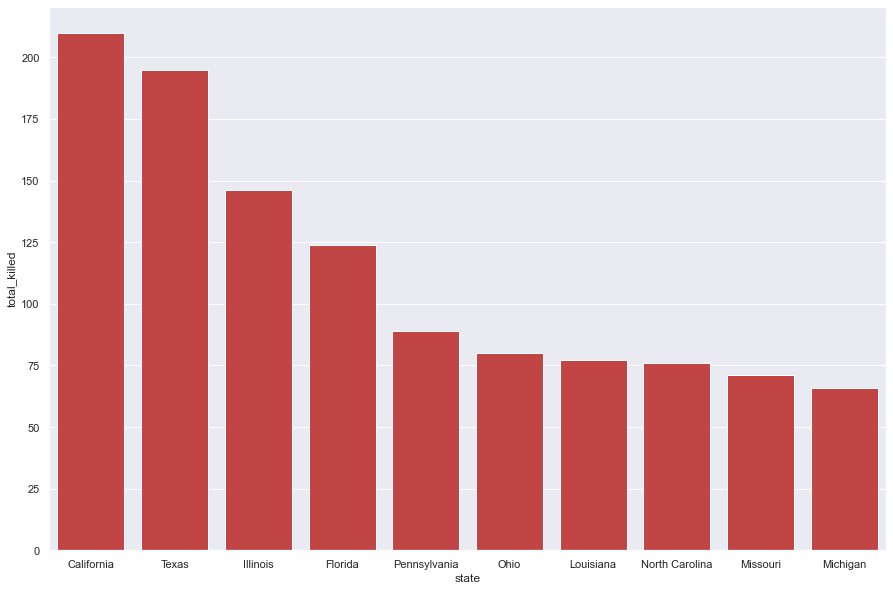

In [123]:
#Printing a bar chart
sns.set(rc= {'figure.figsize':(15,10)})
sns.barplot(x ="state", y= "total_killed", data=bar_chart_df, color= "#d63031")